In [172]:
# Group 29
# Assignment 3 | Author: Yash Kumar Sahu | Roll No: CED19I039 
# Assignment 3 | Author: Radhika Mittal | Roll No: CED19I050
# Assignment 3 | Author: Deep Patel | Roll No: ME21D0004

## Libraries


In [173]:
from matplotlib import pyplot as plt                                              
import cv2
import glob
import os
import numpy as np
import ntpath
import math


## Read Lena Image 

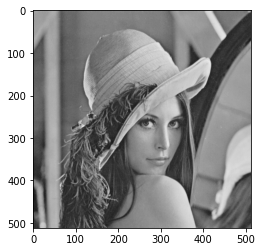

In [174]:
cwd = os.getcwd()                                            # get current directory
img = cv2.imread(cwd+"/Lena.png") 
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)             # read image for its location

plt.imshow(gray_img, cmap='gray', vmin = 0, vmax = 255)


Part 1 | Adding Gaussian noise | Image averaging (Deep)


In [175]:
## Function to add additive gaussian noise
def add_gaussian_noise(image, mean=0, std=30):

    gaus_noise = np.random.normal(mean, std, image.shape)
    image = image.astype("uint8")
    noise_img = image + gaus_noise
    return noise_img.astype("uint8") 

In [176]:
## Add gaussian noise no to input gray image X 10
noise_gray_img=[]
for i in range(10):
    noise_gray_img.append(add_gaussian_noise(gray_img))

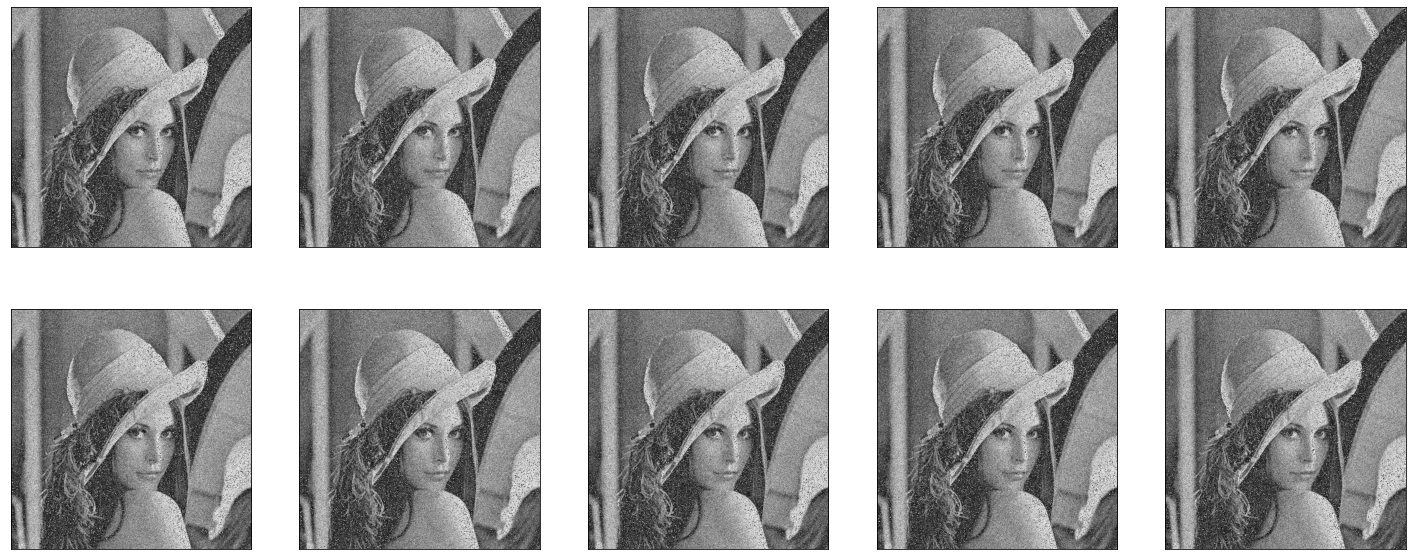

In [177]:
## Display noise image
f = plt.figure()
f.set_figwidth(5*5)
f.set_figheight(2*5)

for i in range(10):
    # display Different Angle
    
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(noise_gray_img[i],  cmap='gray', vmin = 0, vmax = 255)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    plt.subplots_adjust(hspace = 0.25 )
plt.show()  

In [178]:
## Average of noisy images
average_img=np.zeros(noise_gray_img[0].shape,np.double)
for im in noise_gray_img:
    average_img=average_img+np.array(im,dtype=np.double)/10
average_img=np.array(np.round(average_img),dtype=np.uint8)   


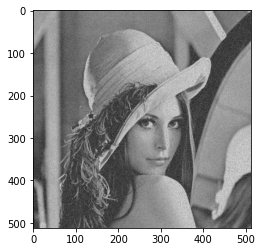

In [179]:
## Display Average of noisy images
plt.imshow(average_img, cmap='gray', vmin = 0, vmax = 255) 

In [180]:
## For quantitative observation
reference_gray_image=gray_img

for i in range(10):
    rmse=math.sqrt(np.mean(np.square(reference_gray_image-noise_gray_img[i])))
    print(rmse)
    noise_gray_img.append(rmse)  
gray_image_rmse=np.array(noise_gray_img)      
rmse=math.sqrt(np.mean(np.square(average_img-noise_gray_img[i]))) 
print(rmse)

9.888154551449407
9.87889601713339
9.862038326698766
9.873204321506709
9.884117263487374
9.874370892923045
9.88283932648286
9.881133094400058
9.884918446877345
9.893733544013676
9.868190493918709


C:\Users\deep0\AppData\Local\Temp\ipykernel_10796\2235735322.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  gray_image_rmse=np.array(noise_gray_img)


Part 2 | Nearest Neighbor Interpolation 

Part 3 | Bilinear Interpolation